## Assignment of Lecture 04

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ + 见Lesson-04-review
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part1-2: Finish the Solution Parse Part of Edit-Distance

### Part 2 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑快与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

### Part 3: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans:动态规划方式能够准确、可靠的给出我们期望的最小值。与之前讨论的搜索问题的最大区别再于，之前的搜索问题对于重复问题点未进行计算。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans:动态规划可获得最优解，而机器学习模型本质上是在获取概率最大的解作为最优解，准确性不如动态规划。并且，机器学习主要用在预测，动态规划是对当前数据的求解。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans:市场规划、车间生产调配、生产设备更新

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans:连锁便利店定期的货物配送路线、码头货物装载、旅游线路规划

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans:  
  + 最优子结构：大问题的最优解可以由小问题的最优解推出，这个性质叫做“最优子结构性质”。
  + 子问题重叠：不同的解决方案会多次重复计算子问题。
  + 边界：给出的状态转移方程是一个递推式，需要一个递推的终止条件或边界条件。
  + 无后效性：当前子问题最优解与先前发生问题无关。

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:动态规划的特点即为动态规划应用的限制条件。

## Part 4 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [4]:
import random
import matplotlib.pylab as plt
from functools import lru_cache

In [5]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

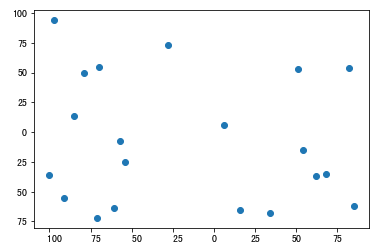

In [6]:
plt.scatter(latitudes, longitude)

给定一个初始点 $P$, 已经 $k$个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短? 

例如： 

In [15]:
chosen_p = (5, 10)

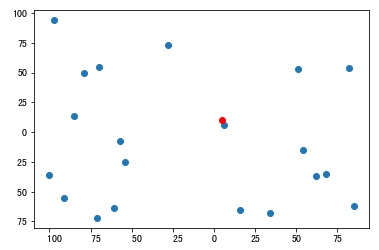

In [16]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

思路：  
+ 子问题求解：$$\sqrt{(x-x_1)^2+(y-y_1)^2}$$
+ 子问题重复：@lru_cache(maxsize=2**15)
+ 边界：所有点距离求解完成
+ 初始点：$$\sqrt{(poins[-1][x]-x_1)^2+(poins[-1][y]-y_1)^2}$$

/home/yangsong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


运行时间：0.3053300000000001s


/home/yangsong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


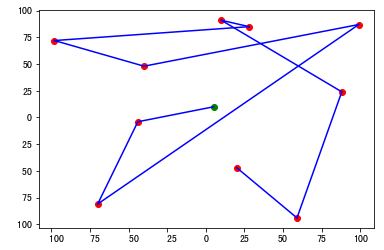

In [4]:
import math
import time
import random
import matplotlib.pylab as plt
from functools import lru_cache
from collections import defaultdict
start=time.clock()
latitudes = [random.randint(-100, 100) for _ in range(10)]
longitude = [random.randint(-100, 100) for _ in range(10)]
selected =()
chosen_p=(5, 10)
points=list(set(zip(latitudes,longitude))|set((selected)))
solution=[]
@lru_cache(maxsize=None)
def get_distance(point1,point2):
    x,y=point1
    x_1,y_1=point2
    return math.sqrt(pow(x-x_1,2)+pow(y-y_1,2))
@lru_cache(maxsize=None)
def min_distance(chosen_p,selected):
    if len(selected)==len(points):return 0,0
    selected=list(selected)
    list_points=set(points)-set(selected)
    distance,point=min([(get_distance(chosen_p,p)+min_distance(p,tuple(sorted(selected+[p],key=points.index) ))[0],p) for p in list_points ],key=lambda x:x[0])
    last_selected=sorted(list(set(selected)-set(chosen_p)),key=selected.index)
    if last_selected  in solution:
        for x in solution:
            if x==last_selected:
                x=selected
    else:
        solution.append(selected)
    return distance,point

distance,point=min_distance(chosen_p,selected)
for x in solution:
    if sorted([point]+x,key=points.index)==points:
        path=[chosen_p]+[point]+x
plt.scatter([chosen_p[0]], [chosen_p[1]], color='g')
plt.scatter(latitudes, longitude, color='r')
for k,v in enumerate(path):
    if k<len(path)-1:
        x,y=v
        x_1,y_1=path[k+1]
        plt.plot([x,x_1],[y,y_1], color='b')
end=time.clock()
print("运行时间：{}s".format(end-start))